This notebook is to just compare RSR and RSR++. Just the last step where the multiplication is happening for each block.

In [2]:
import sys
sys.path.insert(0, '..')

from numpy_impl.multipliers_np import (
    NaiveMultiplier, 
    RSRBinaryMultiplier, 
    RSRTernaryMultiplier,
    RSRPlusPlusBinaryMultiplier
)

import random
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from tqdm import tqdm

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def generate_binary_matrix(k):
        num_rows = 2 ** k
        binary_matrix = np.array([list(map(int, np.binary_repr(i, width=k))) for i in range(num_rows)])
        return binary_matrix

def faster_mult(segmented_sum, k):
        result = np.empty(k)
        for i in range(k, 0, -1):
            result[i - 1] = np.sum(segmented_sum[1::2])
            segmented_sum = segmented_sum[::2] + segmented_sum[1::2]
        return result

def naive(segmented_sum, bin_mat):
    return np.dot(segmented_sum, bin_mat)

faster_mult(np.array([1, 2, 3, 4, 5, 6, 7, 8]), 3), naive(np.array([1, 2, 3, 4, 5, 6, 7, 8]), generate_binary_matrix(3))

(array([26., 22., 20.]), array([26, 22, 20]))

In [3]:
ns = [12, 13, 14, 15, 16, 17, 18, 19, 20]

In [10]:
rsrpp_times = []
rsr_times = []
for i in range(1):
    for n in ns:
        bin_k = generate_binary_matrix(n)
        print(f"k: {n}")
        vector = np.random.randint(0, 100, 2**n)
        print("fast: ", end="")
        rsrpp = %timeit -o faster_mult(vector, n)
        print("naive: ", end="")
        rsr = %timeit -o naive(vector, bin_k)
        rsrpp_times.append(rsrpp.average)
        rsr_times.append(rsr.average)

k: 12
fast: 47.4 μs ± 133 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
naive: 30.6 μs ± 30 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
k: 13
fast: 56.8 μs ± 165 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
naive: 130 μs ± 99.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
k: 14
fast: 71.8 μs ± 79.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
naive: 602 μs ± 98.9 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
k: 15
fast: 98.4 μs ± 191 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
naive: 1.48 ms ± 293 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
k: 16
fast: 153 μs ± 157 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
naive: 3.13 ms ± 911 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
k: 17
fast: 277 μs ± 262 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
naive: 8.05 ms ± 11.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
k: 18
fa

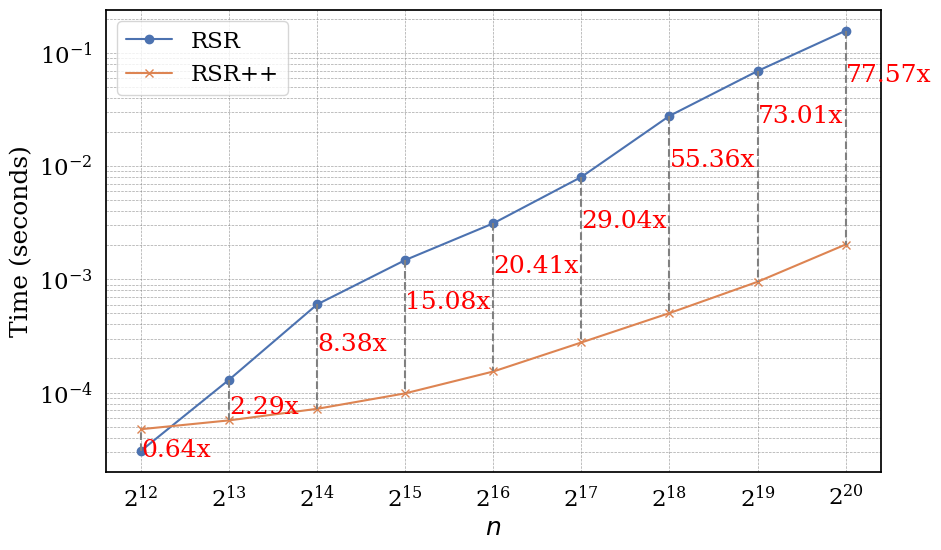

In [11]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))


plt.rcParams['font.family'] = 'serif'  # Set font to Times New Roman
plt.rcParams['text.color'] = 'black'  # Set text color to black
plt.rcParams['axes.labelcolor'] = 'black'  # Set axis labels color to black
plt.rcParams['xtick.color'] = 'black'  # Set x-tick color to black
plt.rcParams['ytick.color'] = 'black'  # Set y-tick color to black
plt.rcParams['axes.edgecolor'] = 'black'  # Set axes edge color to black
plt.rcParams['axes.titleweight'] = 'bold'  # Bold title for emphasis

plt.xlabel("$n$")
plt.ylabel("Time (seconds)")

plt.xscale('log', base=2)
plt.yscale('log', base=10)

plt.grid(True, which="both", ls="--", lw=0.5, color='gray', alpha=0.7)

plt.gca().xaxis.set_major_locator(LogLocator(base=2))

plt.plot([2**i for i in ns], rsr_times, label="RSR", marker="o")
plt.plot([2**i for i in ns], rsrpp_times, label="RSR++", marker="x")


for i, n in enumerate(ns):
    plt.plot([2**n, 2**n], [rsr_times[i], rsrpp_times[i]], 
            color='gray', linestyle='--')

# Label the points with the speedup factor
for i, n in enumerate(ns):
    plt.text(2**n, (rsr_times[i] + rsrpp_times[i]) / 2, f"{rsr_times[i]/rsrpp_times[i]:.2f}x",
            ha='left', va="top", color='red')
plt.legend()